# Power Data Analysis

## Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV

In [4]:
DATA_PATH = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\Power_DEC-JAN_2023_AllSensors.csv"
SAVE_PATH = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\Power_DEC-JAN_2023_AllSensors_Refactored.csv"

In [5]:
df = pd.read_csv(DATA_PATH, low_memory=False)
df['DateTime'] = pd.to_datetime(df['DateTime'], format="mixed", dayfirst=True)
print(type(df['DateTime']))

<class 'pandas.core.series.Series'>


In [6]:
print(df['TagName'].unique())

['Power_S_9_7_0_W6.CV' 'Power_S_9_7_0_W4.CV' 'Power_S_9_7_0_W3.CV'
 'Power_S_9_7_0_W2.CV' 'Power_S_9_7_0_W1.CV' 'Power_S_9_7_0_W0.CV']


## Reformat DF

In [7]:
df = df.groupby(['DateTime', 'TagName']).agg({'Value': 'first'}).reset_index()

In [8]:
df = df.pivot(index = "DateTime", columns = "TagName", values="Value")
df.to_csv(SAVE_PATH)

In [9]:
df.head(10)

TagName                 Power_S_9_7_0_W0.CV Power_S_9_7_0_W1.CV  \
DateTime                                                          
2023-12-01 00:00:00.000                   0                   0   
2023-12-01 00:00:00.826                 NaN                 NaN   
2023-12-01 00:00:01.826                 NaN                 NaN   
2023-12-01 00:00:02.825                 NaN                 NaN   
2023-12-01 00:00:03.828                 NaN                 NaN   
2023-12-01 00:00:04.826                 NaN                 NaN   
2023-12-01 00:00:05.828                 NaN                 NaN   
2023-12-01 00:00:06.824                 NaN                 NaN   
2023-12-01 00:00:08.824                 NaN                 NaN   
2023-12-01 00:00:09.825                 NaN                 NaN   

TagName                 Power_S_9_7_0_W2.CV Power_S_9_7_0_W3.CV  \
DateTime                                                          
2023-12-01 00:00:00.000  1,4700000286102295                   0   
2023-12-01 00:00:00.826                 NaN                 NaN   
2023-12-01 00:00:01.826                 NaN                 NaN   
2023-12-01 00:00:02.825                 NaN                 NaN   
2023-12-01 00:00:03.828                 NaN                 NaN   
2023-12-01 00:00:04.826                 NaN                 NaN   
2023-12-01 00:00:05.828                 NaN                 NaN   
2023-12-01 00:00:06.824                 NaN                 NaN   
2023-12-01 00:00:08.824                 NaN                 NaN   
2023-12-01 00:00:09.825                 NaN                 NaN   

TagName                 Power_S_9_7_0_W4.CV Power_S_9_7_0_W6.CV  
DateTime                                                         
2023-12-01 00:00:00.000   49,81999969482422                   0  
2023-12-01 00:00:00.826                  50                 NaN  
2023-12-01 00:00:01.826  50,650001525878906                 NaN  
2023-12-01 00:00:02.825    50,7400016784668                 NaN  
2023-12-01 00:00:03.828  50,959999084472656                 NaN  
2023-12-01 00:00:04.826  51,189998626708984                 NaN  
2023-12-01 00:00:05.828    51,2400016784668                 NaN  
2023-12-01 00:00:06.824  51,310001373291016                 NaN  
2023-12-01 00:00:08.824   51,38999938964844                 NaN  
2023-12-01 00:00:09.825   51,47999954223633                 NaN

In [10]:
df = df.apply(lambda x: x.str.replace(',', '.')).astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3310269 entries, 2023-12-01 00:00:00 to 2023-12-31 23:59:59.797000
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Power_S_9_7_0_W0.CV  float64
 1   Power_S_9_7_0_W1.CV  float64
 2   Power_S_9_7_0_W2.CV  float64
 3   Power_S_9_7_0_W3.CV  float64
 4   Power_S_9_7_0_W4.CV  float64
 5   Power_S_9_7_0_W6.CV  float64
dtypes: float64(6)
memory usage: 176.8 MB


In [12]:
comparison = pd.DataFrame({
    'Actual Values': df.notna().sum(),
    'NaN Values': df.isna().sum()
})

print(comparison)

                     Actual Values  NaN Values
TagName                                       
Power_S_9_7_0_W0.CV              2     3310267
Power_S_9_7_0_W1.CV              2     3310267
Power_S_9_7_0_W2.CV        1045571     2264698
Power_S_9_7_0_W3.CV              2     3310267
Power_S_9_7_0_W4.CV        2485027      825242
Power_S_9_7_0_W6.CV              2     3310267


In [13]:
df = df.loc[:, df.notna().sum() >= 10]
df.head()

TagName                  Power_S_9_7_0_W2.CV  Power_S_9_7_0_W4.CV
DateTime                                                         
2023-12-01 00:00:00.000                 1.47            49.820000
2023-12-01 00:00:00.826                  NaN            50.000000
2023-12-01 00:00:01.826                  NaN            50.650002
2023-12-01 00:00:02.825                  NaN            50.740002
2023-12-01 00:00:03.828                  NaN            50.959999

In [14]:
df_resampled = df.resample("1H").mean()
df_resampled.head()

TagName              Power_S_9_7_0_W2.CV  Power_S_9_7_0_W4.CV
DateTime                                                     
2023-12-01 00:00:00             1.483557            50.436583
2023-12-01 01:00:00             1.490729            47.976905
2023-12-01 02:00:00             1.492239            47.798559
2023-12-01 03:00:00             1.487219            46.350979
2023-12-01 04:00:00             1.493732            51.801153

## Plots

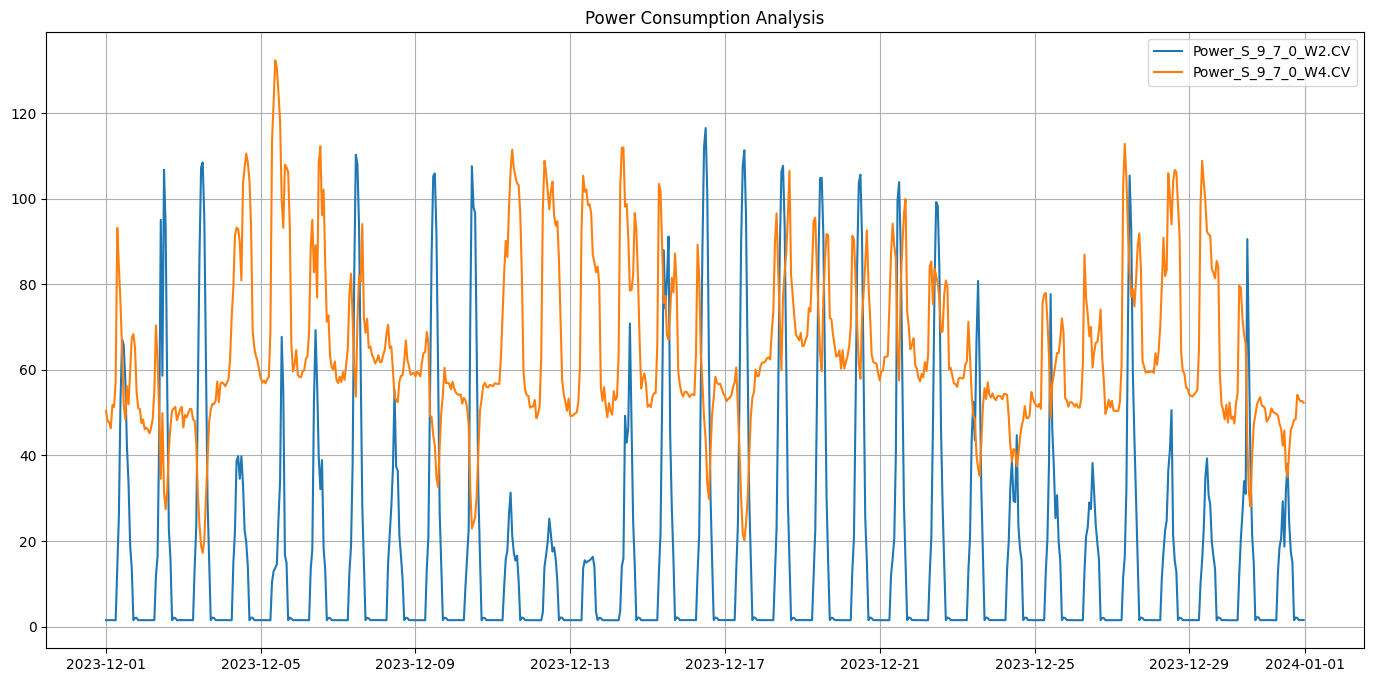

In [24]:
plt.figure(figsize=(17, 8))
plt.title("Power Consumption Analysis")
plt.grid(True)
plt.plot(df_resampled['Power_S_9_7_0_W2.CV'], label = "Power_S_9_7_0_W2.CV")
plt.plot(df_resampled['Power_S_9_7_0_W4.CV'], label = "Power_S_9_7_0_W4.CV")
plt.legend()
plt.show()

# New Analysis

In [16]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Creation

In [17]:
# Paths
active_power_w4_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\ACT_Power_W4_FEB-MAR_2024.csv"
reactive_power_w4_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\REC_Power_W4_FEB-MAR_2024.csv"
active_power_w6_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\ACT_Power_W6_FEB-MAR_2024.csv"
reactive_power_w6_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\REC_Power_W6_FEB_MAR_2024.csv"

In [18]:
# Dataset reading
ac_w4_dataset = pd.read_csv(active_power_w4_path, sep=",")
rc_w4_dataset = pd.read_csv(reactive_power_w4_path, sep=",")
ac_w6_dataset = pd.read_csv(active_power_w6_path, sep=",")
rc_w6_dataset = pd.read_csv(reactive_power_w6_path, sep=",")
print("Done")

Done


In [19]:
# Value Conversion
ac_w4_dataset['Value'] = ac_w4_dataset['Value'].str.replace(",", ".").astype(float)
rc_w4_dataset['Value'] = rc_w4_dataset['Value'].str.replace(",", ".").astype(float)
ac_w6_dataset['Value'] = ac_w6_dataset['Value'].str.replace(",", ".").astype(float)
rc_w6_dataset['Value'] = rc_w6_dataset['Value'].str.replace(",", ".").astype(float)
print("Done")

Done


In [20]:
# Conversion to Datetime
ac_w4_dataset['DateTime'] = pd.to_datetime(ac_w4_dataset['DateTime'], dayfirst=False, format="mixed")
rc_w4_dataset['DateTime'] = pd.to_datetime(rc_w4_dataset['DateTime'], dayfirst=False, format="mixed")
ac_w6_dataset['DateTime'] = pd.to_datetime(ac_w6_dataset['DateTime'], dayfirst=False, format="mixed")
rc_w6_dataset['DateTime'] = pd.to_datetime(rc_w6_dataset['DateTime'], dayfirst=False, format="mixed")
print("Done")

Done


In [21]:
# Renaming Datasets
new_names_ac_w4 = {"Value": "Power_P_1_7_0_W4.CV"}
new_names_rc_w4 = {"Value": "Power_Q_3_7_0_W4.CV"}
new_names_ac_w6 = {"Value": "Power_P_1_7_0_W6.CV"}
new_names_rc_w6 = {"Value": "Power_Q_3_7_0_W6.CV"}

ac_w4_dataset = ac_w4_dataset.rename(columns=new_names_ac_w4)
rc_w4_dataset = rc_w4_dataset.rename(columns=new_names_rc_w4)
ac_w6_dataset = ac_w6_dataset.rename(columns=new_names_ac_w6)
rc_w6_dataset = rc_w6_dataset.rename(columns=new_names_rc_w6)
print("Done")

Done


In [22]:
# Indexing
ac_w4_dataset.set_index(ac_w4_dataset['DateTime'], inplace=True, drop=True)
rc_w4_dataset.set_index(rc_w4_dataset['DateTime'], inplace=True, drop=True)
ac_w6_dataset.set_index(ac_w6_dataset['DateTime'], inplace=True, drop=True)
rc_w6_dataset.set_index(rc_w6_dataset['DateTime'], inplace=True, drop=True)
print("Done")

Done


In [23]:
#dropping useless columns
ac_w4_dataset = ac_w4_dataset.drop(["DateTime", "TagName"], axis=1)
rc_w4_dataset = rc_w4_dataset.drop(["DateTime", "TagName"], axis=1)
ac_w6_dataset = ac_w6_dataset.drop(["DateTime", "TagName"], axis=1)
rc_w6_dataset = rc_w6_dataset.drop(["DateTime", "TagName"], axis=1)

### Single Value Plots 

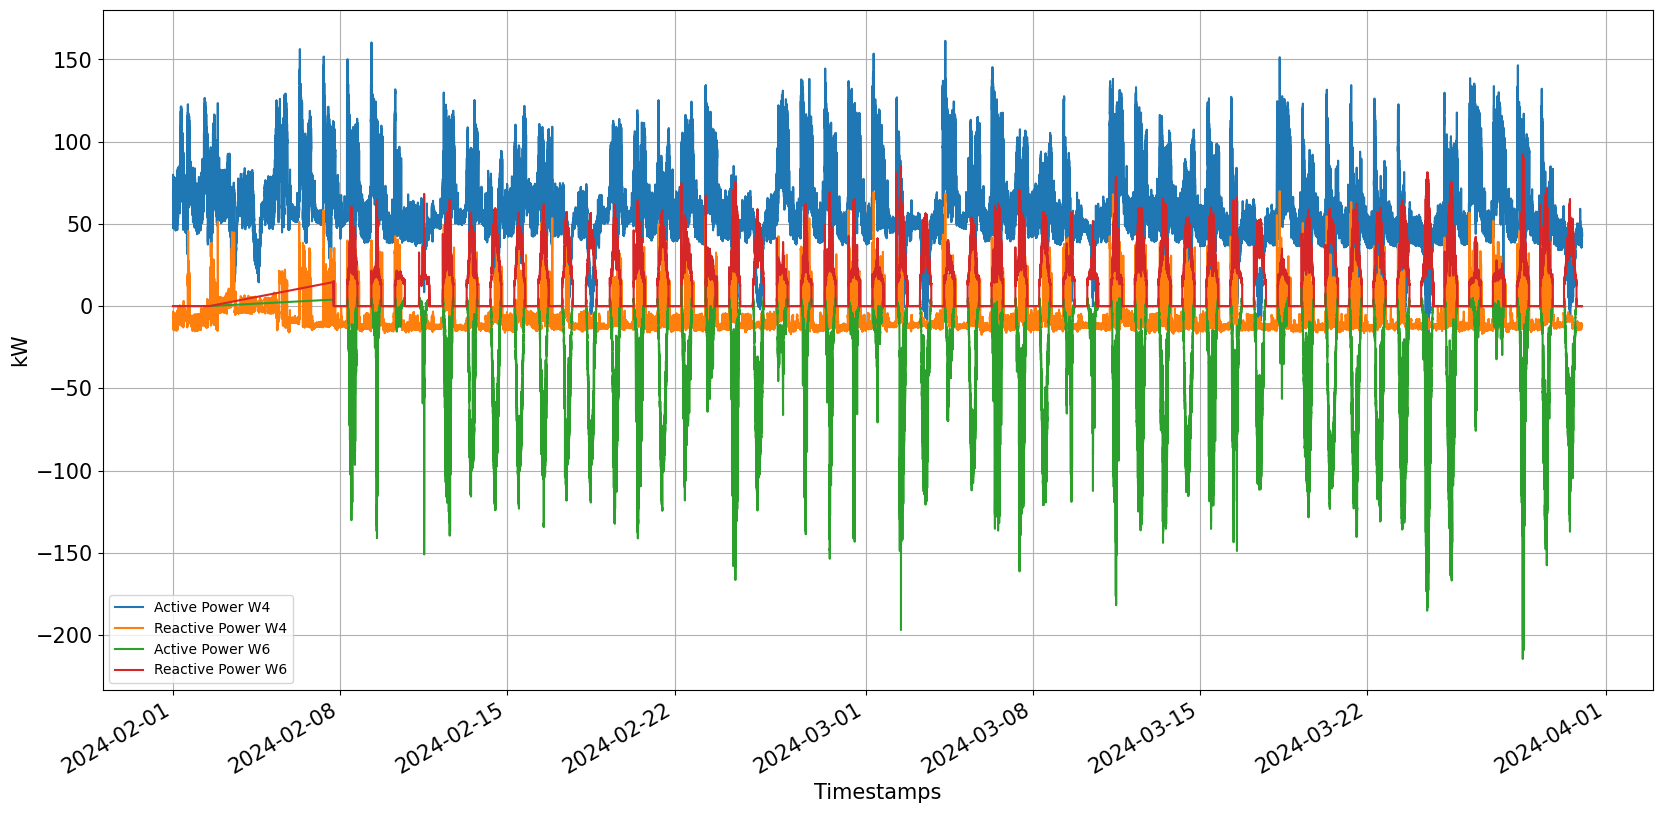

In [33]:
plt.figure(figsize=(20, 10))
ac_w4_dataset['Power_P_1_7_0_W4.CV'].plot(label="Active Power W4")
rc_w4_dataset['Power_Q_3_7_0_W4.CV'].plot(label="Reactive Power W4")
ac_w6_dataset['Power_P_1_7_0_W6.CV'].plot(label="Active Power W6")
rc_w6_dataset['Power_Q_3_7_0_W6.CV'].plot(label="Reactive Power W6")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("kW", fontsize=15)
plt.legend()
plt.grid(True)

In [24]:
# Dataset Creation
dataset = pd.concat([ac_w4_dataset, rc_w4_dataset, ac_w6_dataset, rc_w6_dataset], ignore_index=False)

In [25]:
dataset.head(10)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                            
2024-02-01 00:00:00.000            69.760002                  NaN   
2024-02-01 00:00:00.260            69.559998                  NaN   
2024-02-01 00:00:01.231            69.709999                  NaN   
2024-02-01 00:00:02.168            71.019997                  NaN   
2024-02-01 00:00:03.293            71.349998                  NaN   
2024-02-01 00:00:04.278            70.480003                  NaN   
2024-02-01 00:00:05.090            69.989998                  NaN   
2024-02-01 00:00:06.269            69.910004                  NaN   
2024-02-01 00:00:07.003            70.050003                  NaN   
2024-02-01 00:00:08.333            69.970001                  NaN   

                         Power_P_1_7_0_W6.CV  Power_Q_3_7_0_W6.CV  
DateTime                                                           
2024-02-01 00:00:00.000                  NaN                  NaN  
2024-02-01 00:00:00.260                  NaN                  NaN  
2024-02-01 00:00:01.231                  NaN                  NaN  
2024-02-01 00:00:02.168                  NaN                  NaN  
2024-02-01 00:00:03.293                  NaN                  NaN  
2024-02-01 00:00:04.278                  NaN                  NaN  
2024-02-01 00:00:05.090                  NaN                  NaN  
2024-02-01 00:00:06.269                  NaN                  NaN  
2024-02-01 00:00:07.003                  NaN                  NaN  
2024-02-01 00:00:08.333                  NaN                  NaN

In [26]:
# Null count before resampling
total_values = dataset.count()
total_count = total_values.sum()
null_counts = dataset.isnull().sum()
null_percentages = (null_counts / total_count) * 100
print(f"The dataset has {total_count} elements, with the following percentages of null values:\n{null_percentages}")

The dataset has 13003192 elements, with the following percentages of null values:
Power_P_1_7_0_W4.CV    64.468186
Power_Q_3_7_0_W4.CV    68.064549
Power_P_1_7_0_W6.CV    86.093684
Power_Q_3_7_0_W6.CV    81.373581
dtype: float64


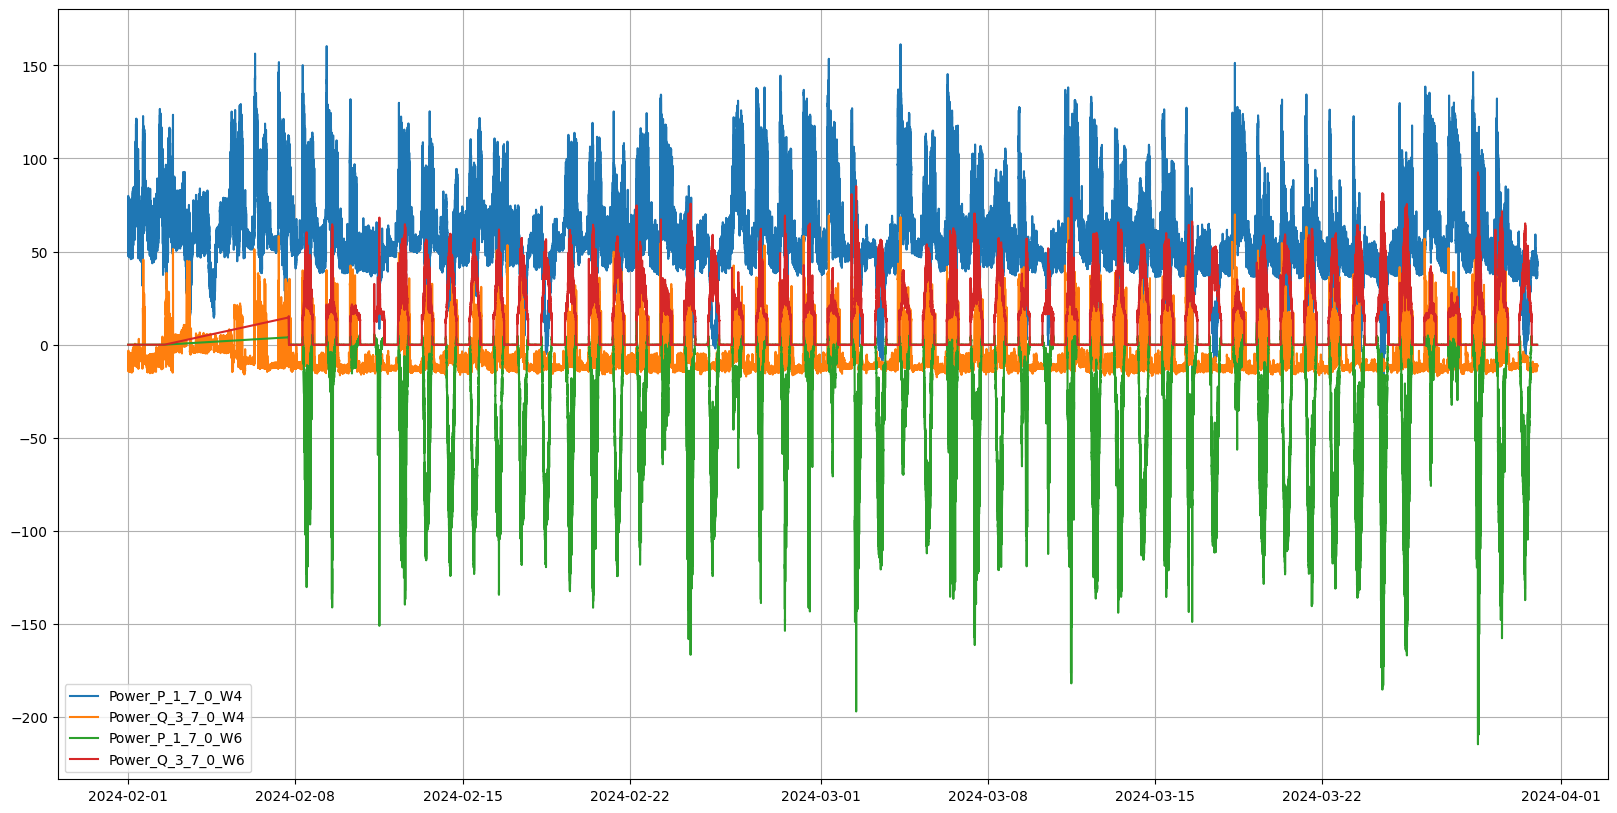

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(dataset['Power_P_1_7_0_W4.CV'], label = "Power_P_1_7_0_W4")
plt.plot(dataset['Power_Q_3_7_0_W4.CV'], label = "Power_Q_3_7_0_W4")
plt.plot(dataset['Power_P_1_7_0_W6.CV'], label = "Power_P_1_7_0_W6")
plt.plot(dataset['Power_Q_3_7_0_W6.CV'], label = "Power_Q_3_7_0_W6")
plt.legend()
plt.grid(True)

In [27]:
# Resample
dataset_resampled = dataset.resample("1H").mean()

In [28]:
dataset_resampled = dataset_resampled.dropna()

In [29]:
dataset_resampled.head(10)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2024-02-01 00:00:00            68.401261            -8.036462   
2024-02-02 12:00:00            50.352004            -3.191518   
2024-02-07 17:00:00            82.510015             1.743308   
2024-02-07 18:00:00            76.567666            -1.562526   
2024-02-07 19:00:00            59.405278           -11.708486   
2024-02-07 20:00:00            57.486617           -11.463111   
2024-02-07 21:00:00            59.277490           -10.387158   
2024-02-07 22:00:00            56.331688           -11.131030   
2024-02-07 23:00:00            53.859460           -12.050861   
2024-02-08 00:00:00            48.816100           -11.600663   

                     Power_P_1_7_0_W6.CV  Power_Q_3_7_0_W6.CV  
DateTime                                                       
2024-02-01 00:00:00             0.000000            -0.040000  
2024-02-02 12:00:00             0.000000             0.000000  
2024-02-07 17:00:00             1.863166             6.490438  
2024-02-07 18:00:00             0.025000            -0.055000  
2024-02-07 19:00:00             0.025000            -0.055000  
2024-02-07 20:00:00             0.025000            -0.055000  
2024-02-07 21:00:00             0.025000            -0.055000  
2024-02-07 22:00:00             0.025000            -0.055000  
2024-02-07 23:00:00             0.025000            -0.055000  
2024-02-08 00:00:00             0.025000            -0.055000

In [30]:
# Null count after resampling
total_values = dataset_resampled.count()
total_count = total_values.sum()

null_counts = dataset_resampled.isnull().sum()
null_percentages = (null_counts / total_count) * 100
print(f"The dataset has {total_count} elements, with the following percentages of null values:\n{null_percentages}")

The dataset has 4892 elements, with the following percentages of null values:
Power_P_1_7_0_W4.CV    0.0
Power_Q_3_7_0_W4.CV    0.0
Power_P_1_7_0_W6.CV    0.0
Power_Q_3_7_0_W6.CV    0.0
dtype: float64


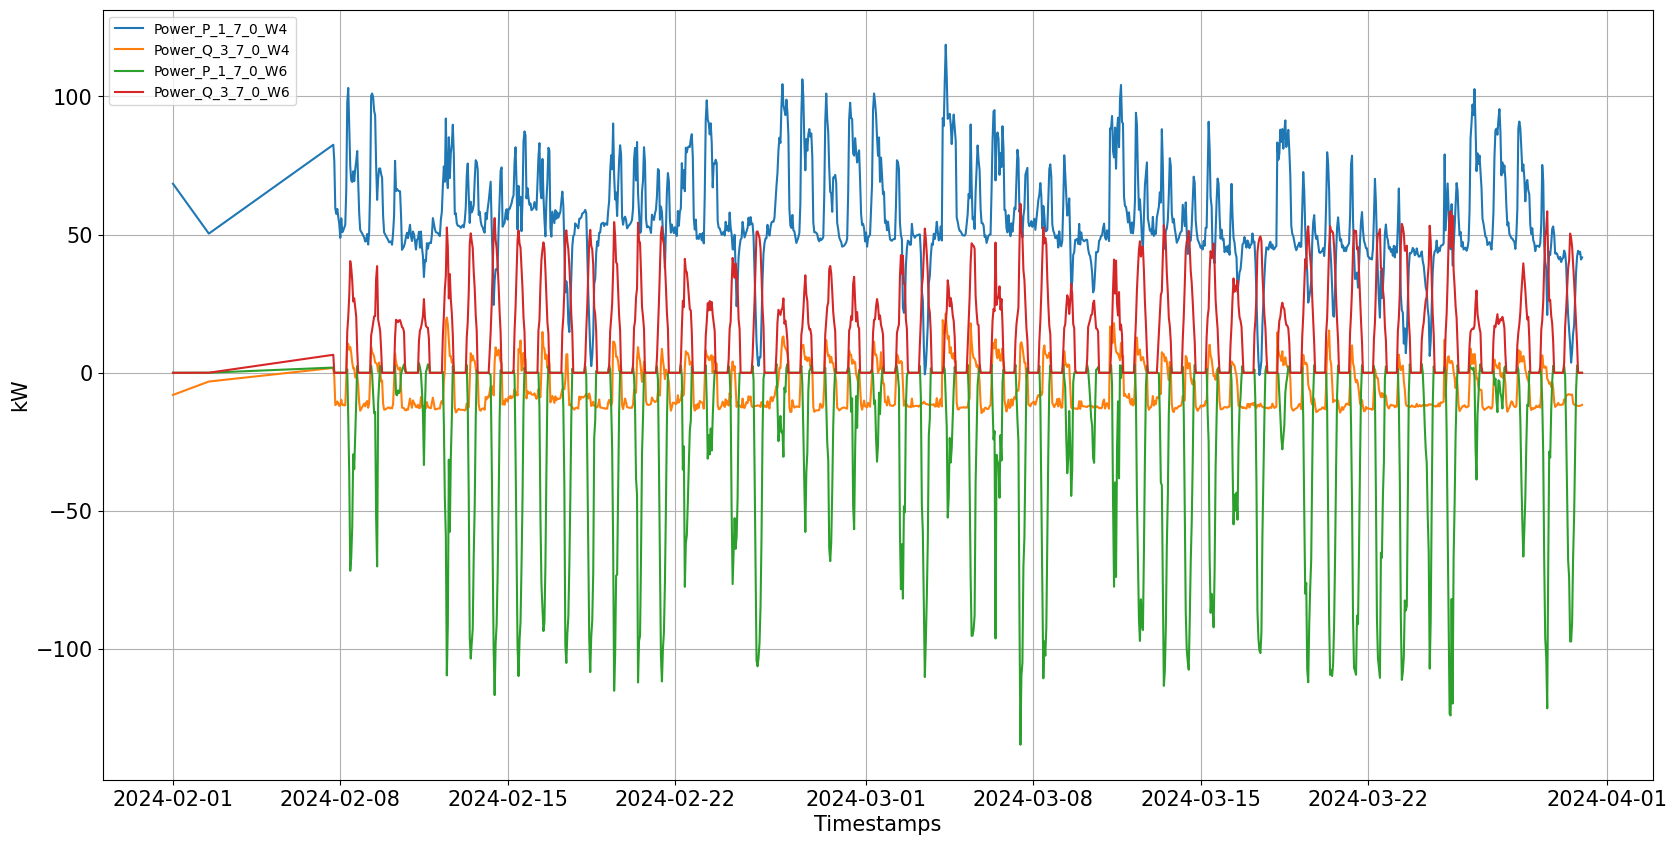

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(dataset_resampled['Power_P_1_7_0_W4.CV'], label = "Power_P_1_7_0_W4")
plt.plot(dataset_resampled['Power_Q_3_7_0_W4.CV'], label = "Power_Q_3_7_0_W4")
plt.plot(dataset_resampled['Power_P_1_7_0_W6.CV'], label = "Power_P_1_7_0_W6")
plt.plot(dataset_resampled['Power_Q_3_7_0_W6.CV'], label = "Power_Q_3_7_0_W6")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("kW", fontsize=15)
plt.legend()
plt.grid(True)

## Calculate Apparent Power

In [32]:
def calc_apparent_power(active_power, reactive_power):
    
    active = active_power**2
    reactive = reactive_power**2
    
    apparent_power = math.sqrt(reactive + active)
    
    return apparent_power

In [33]:
dataset_resampled['APP_W4'] = dataset_resampled.apply(lambda row: calc_apparent_power(row["Power_P_1_7_0_W4.CV"], row['Power_Q_3_7_0_W4.CV']), axis=1)
dataset_resampled['APP_W6'] = dataset_resampled.apply(lambda row: calc_apparent_power(row["Power_P_1_7_0_W6.CV"], row['Power_Q_3_7_0_W6.CV']), axis=1)

In [34]:
dataset_resampled.head(10)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2024-02-01 00:00:00            68.401261            -8.036462   
2024-02-02 12:00:00            50.352004            -3.191518   
2024-02-07 17:00:00            82.510015             1.743308   
2024-02-07 18:00:00            76.567666            -1.562526   
2024-02-07 19:00:00            59.405278           -11.708486   
2024-02-07 20:00:00            57.486617           -11.463111   
2024-02-07 21:00:00            59.277490           -10.387158   
2024-02-07 22:00:00            56.331688           -11.131030   
2024-02-07 23:00:00            53.859460           -12.050861   
2024-02-08 00:00:00            48.816100           -11.600663   

                     Power_P_1_7_0_W6.CV  Power_Q_3_7_0_W6.CV     APP_W4  \
DateTime                                                                   
2024-02-01 00:00:00             0.000000            -0.040000  68.871745   
2024-02-02 12:00:00             0.000000             0.000000  50.453049   
2024-02-07 17:00:00             1.863166             6.490438  82.528430   
2024-02-07 18:00:00             0.025000            -0.055000  76.583608   
2024-02-07 19:00:00             0.025000            -0.055000  60.548128   
2024-02-07 20:00:00             0.025000            -0.055000  58.618377   
2024-02-07 21:00:00             0.025000            -0.055000  60.180677   
2024-02-07 22:00:00             0.025000            -0.055000  57.420893   
2024-02-07 23:00:00             0.025000            -0.055000  55.191165   
2024-02-08 00:00:00             0.025000            -0.055000  50.175561   

                       APP_W6  
DateTime                       
2024-02-01 00:00:00  0.040000  
2024-02-02 12:00:00  0.000000  
2024-02-07 17:00:00  6.752568  
2024-02-07 18:00:00  0.060415  
2024-02-07 19:00:00  0.060415  
2024-02-07 20:00:00  0.060415  
2024-02-07 21:00:00  0.060415  
2024-02-07 22:00:00  0.060415  
2024-02-07 23:00:00  0.060415  
2024-02-08 00:00:00  0.060415

In [35]:
dataset_resampled['REALW4'] = dataset_resampled['APP_W4']
dataset_resampled['REALW6'] = dataset_resampled['APP_W6']/(185*60)

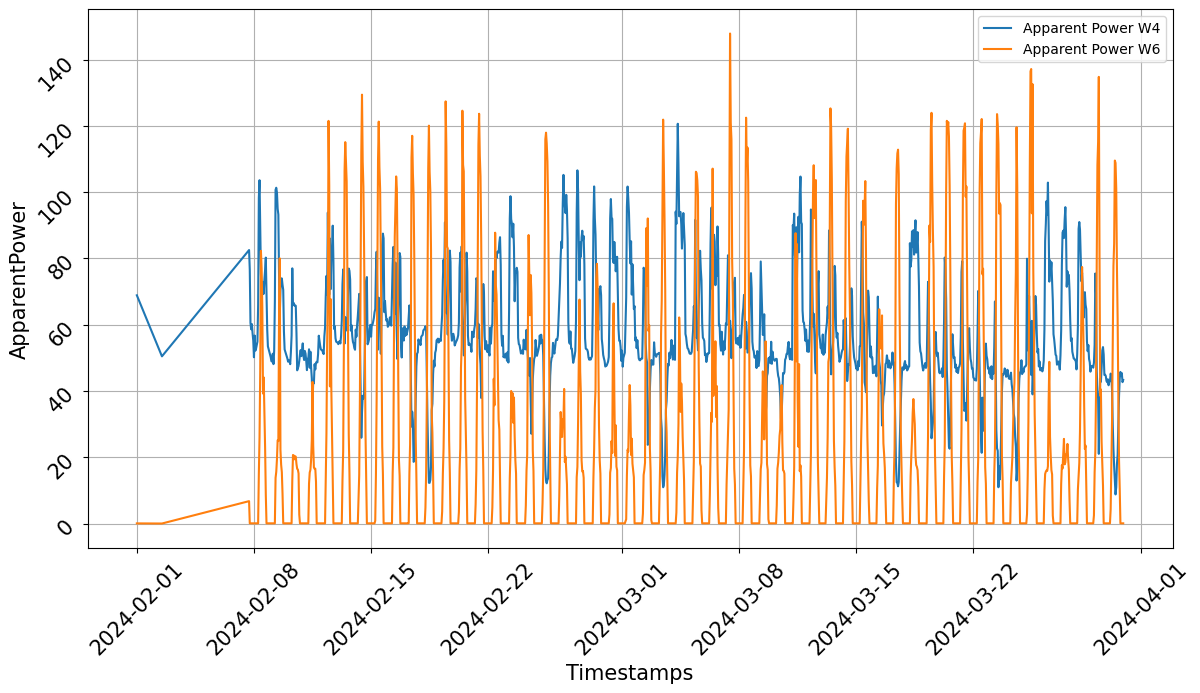

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(dataset_resampled['APP_W4'], label="Apparent Power W4")
plt.plot(dataset_resampled['APP_W6'], label="Apparent Power W6")
plt.xticks(rotation= 45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("ApparentPower", fontsize=15)
plt.grid(True)
plt.legend()
plt.legend()


## Calculate Demand

In [37]:
def calculate_demand(W6, W4):
    
    demand = (W6/(185*60)) + W4
    return demand

In [38]:
dataset_resampled['DEMAND'] = dataset_resampled.apply(lambda row: calc_apparent_power(row["APP_W6"], row['APP_W4']), axis=1)

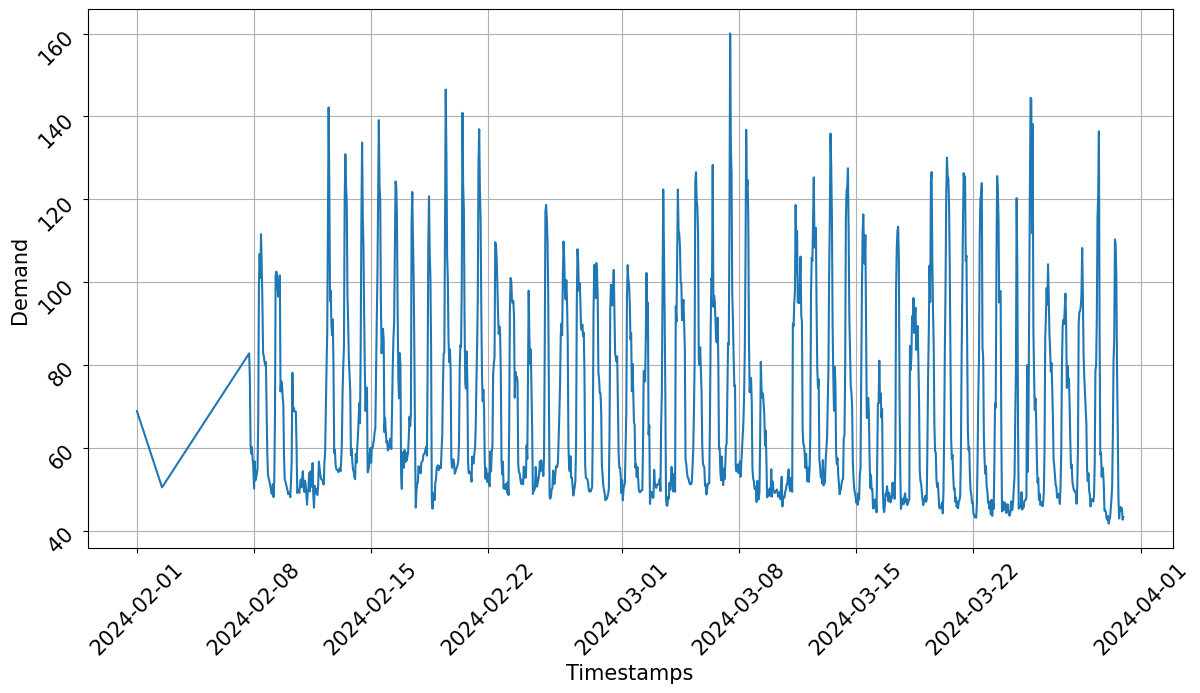

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(dataset_resampled['DEMAND'], label="Demand")
plt.xticks(rotation= 45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("Demand", fontsize=15)
plt.grid(True)
plt.grid(True)
plt.show()

## Demand Modelling

In [28]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, seasonal_mean

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
def plot_moving_average(series, window, x_label, y_label, plot_intervals=False, scale = 1.96):
    
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize =(17, 8))
    plt.title(f'Consumption Moving Average Analysis\n size = {window}')
    plt.plot(rolling_mean, 'g', label = "Rolling Mean Trend")
    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label="Upper/Lower Bound")
        plt.plot(lower_bound, 'r--')
        
    plt.plot(series[window:], label="Actual Values")
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)
    plt.xticks(fontsize=14, rotation=20)
    plt.yticks(fontsize=14)
    plt.legend(loc='best')
    plt.grid(True)

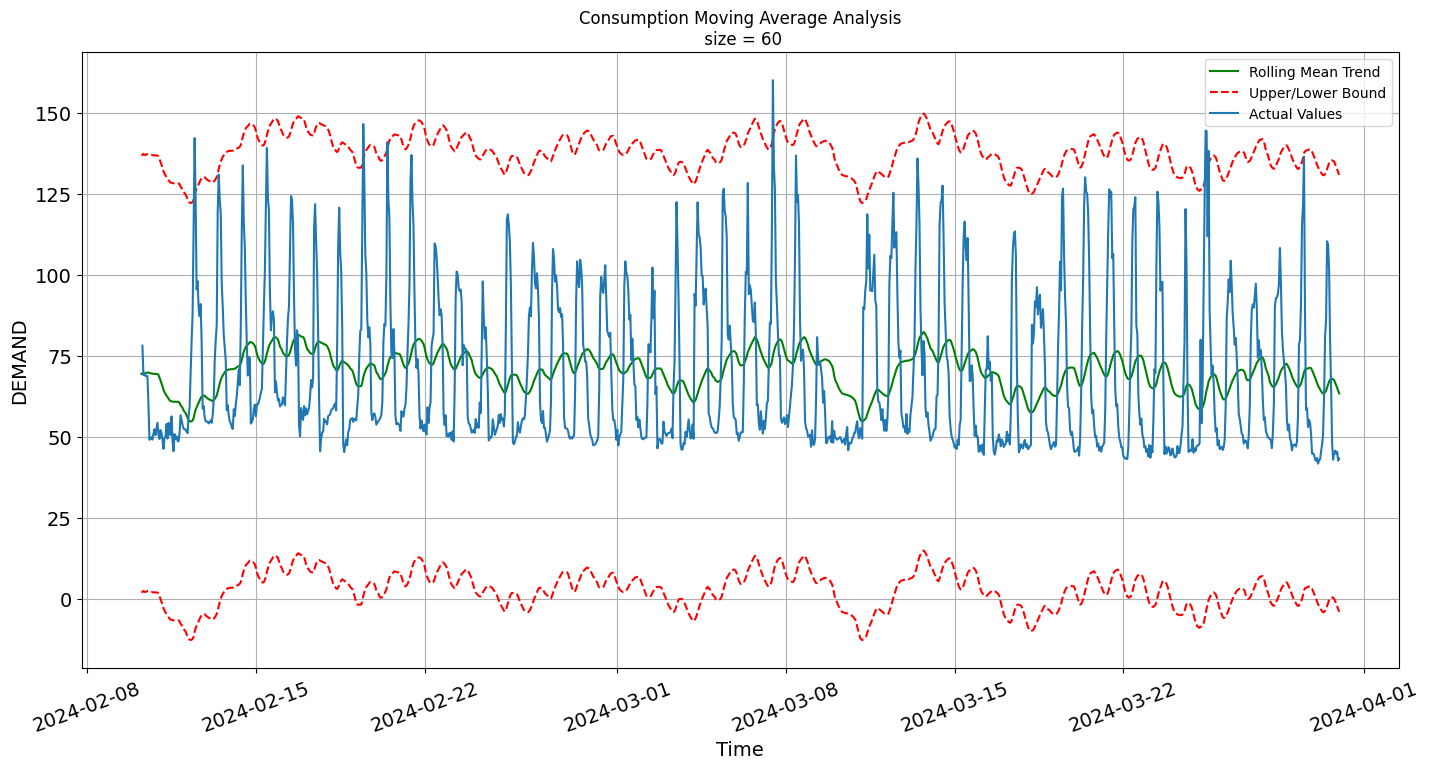

In [30]:
plot_moving_average(dataset_resampled.DEMAND, 60, plot_intervals=True, x_label="Time", y_label="DEMAND")

In [31]:
# Calculating SARIMA Feasibility
ad_fuller_result = adfuller(dataset_resampled.DEMAND)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.783503148241143
p-value: 0.003080681609144146


In [32]:
# Calculating DEMAND TREND
dataset_resampled['DEMAND_TREND'] = dataset_resampled.DEMAND - dataset_resampled.DEMAND.shift(1)
dataset_resampled.head()

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2024-02-01 00:00:00            68.401261            -8.036462   
2024-02-02 12:00:00            50.352004            -3.191518   
2024-02-07 17:00:00            82.510015             1.743308   
2024-02-07 18:00:00            76.567666            -1.562526   
2024-02-07 19:00:00            59.405278           -11.708486   

                     Power_P_1_7_0_W6.CV  Power_Q_3_7_0_W6.CV     APP_W4  \
DateTime                                                                   
2024-02-01 00:00:00             0.000000            -0.040000  68.871745   
2024-02-02 12:00:00             0.000000             0.000000  50.453049   
2024-02-07 17:00:00             1.863166             6.490438  82.528430   
2024-02-07 18:00:00             0.025000            -0.055000  76.583608   
2024-02-07 19:00:00             0.025000            -0.055000  60.548128   

                       APP_W6     REALW4    REALW6     DEMAND  DEMAND_TREND  
DateTime                                                                     
2024-02-01 00:00:00  0.040000  68.871745  0.000004  68.871757           NaN  
2024-02-02 12:00:00  0.000000  50.453049  0.000000  50.453049    -18.418708  
2024-02-07 17:00:00  6.752568  82.528430  0.000608  82.804220     32.351172  
2024-02-07 18:00:00  0.060415  76.583608  0.000005  76.583632     -6.220588  
2024-02-07 19:00:00  0.060415  60.548128  0.000005  60.548158    -16.035474

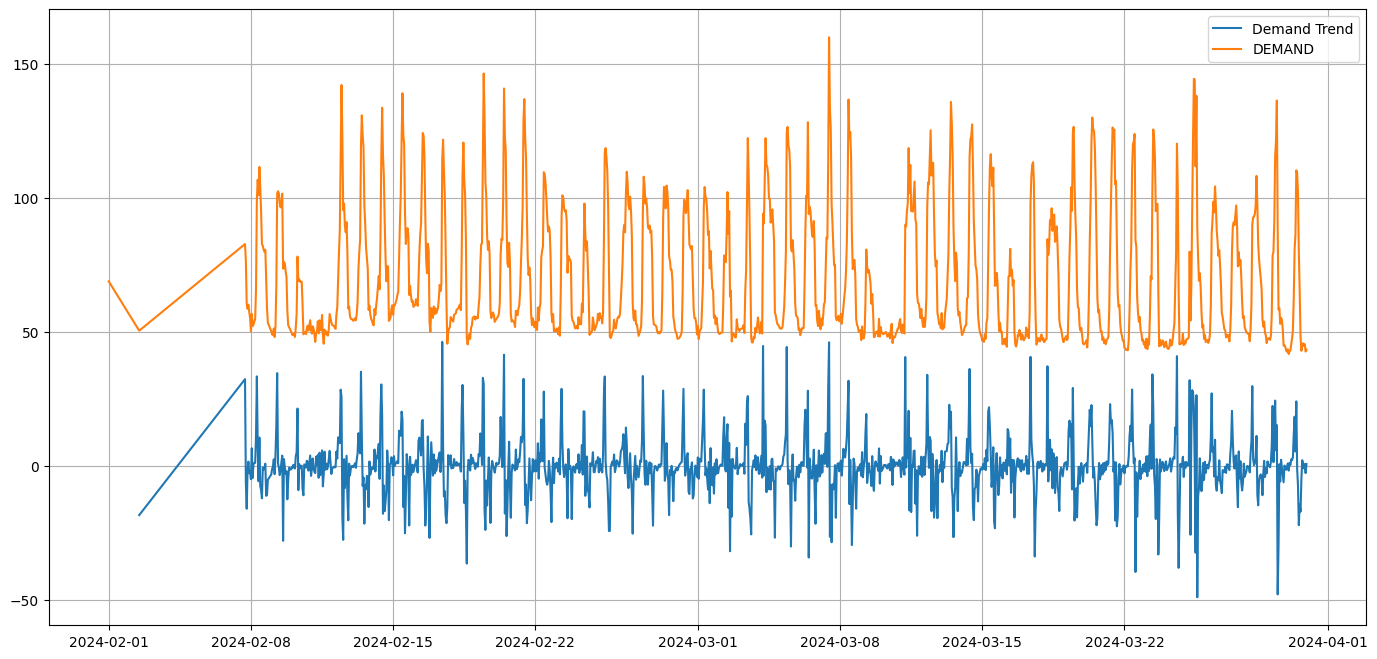

In [33]:
plt.figure(figsize=(17, 8))
plt.plot(dataset_resampled.DEMAND_TREND, label="Demand Trend")
plt.plot(dataset_resampled.DEMAND, label="DEMAND")
plt.legend()
plt.grid(True)

In [34]:
dataset_resampled = dataset_resampled.fillna(0)
ad_fuller_result = adfuller(dataset_resampled.DEMAND_TREND)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -13.23318955659193
p-value: 9.493130549056066e-25


In [ ]:
# ACF and PARTIAl ACF Plots

## Prophet

In [ ]:
!python -m pip install prophet


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error

c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
m = Prophet()
prophet_df = pd.DataFrame()
prophet_df['ds'] = dataset_resampled.index
prophet_df['y'] = dataset_resampled['DEMAND'].values
prophet_df_train = prophet_df.drop(prophet_df.index[-48:])
prophet_df_train.tail()

ds          y
1170 2024-03-28 19:00:00  54.914508
1171 2024-03-28 20:00:00  52.005556
1172 2024-03-28 21:00:00  53.836805
1173 2024-03-28 22:00:00  49.658079
1174 2024-03-28 23:00:00  48.650127

In [41]:
m.fit(prophet_df_train)
future = m.make_future_dataframe(periods=48, freq="H")

14:29:28 - cmdstanpy - INFO - Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1218 2024-03-30 19:00:00  42.283046   26.179262   57.527624
1219 2024-03-30 20:00:00  37.220817   22.913577   51.435204
1220 2024-03-30 21:00:00  34.256828   19.626172   48.539916
1221 2024-03-30 22:00:00  33.858054   19.230153   48.034027
1222 2024-03-30 23:00:00  34.712024   20.241471   48.829958

c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


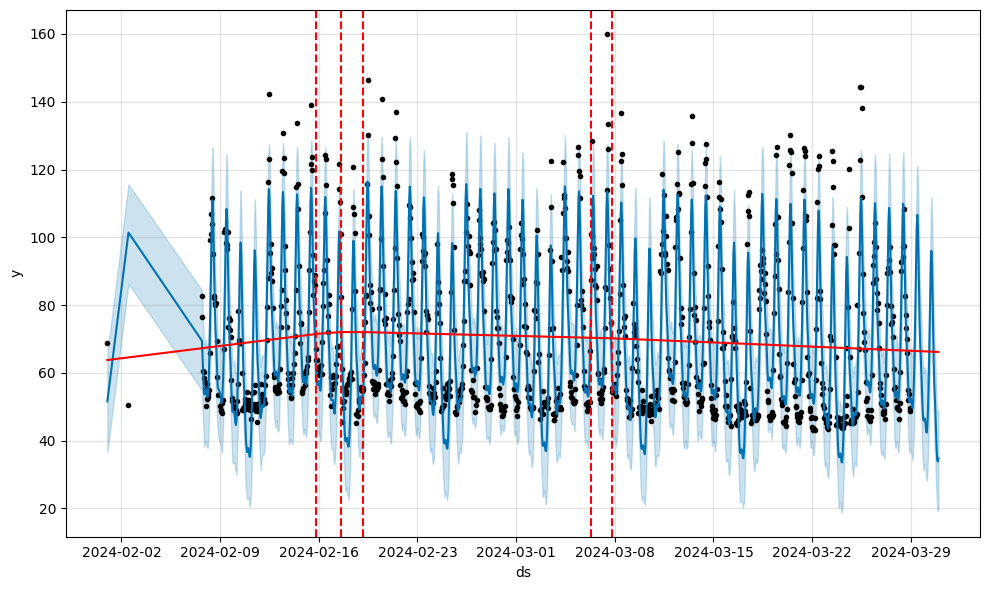

In [43]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

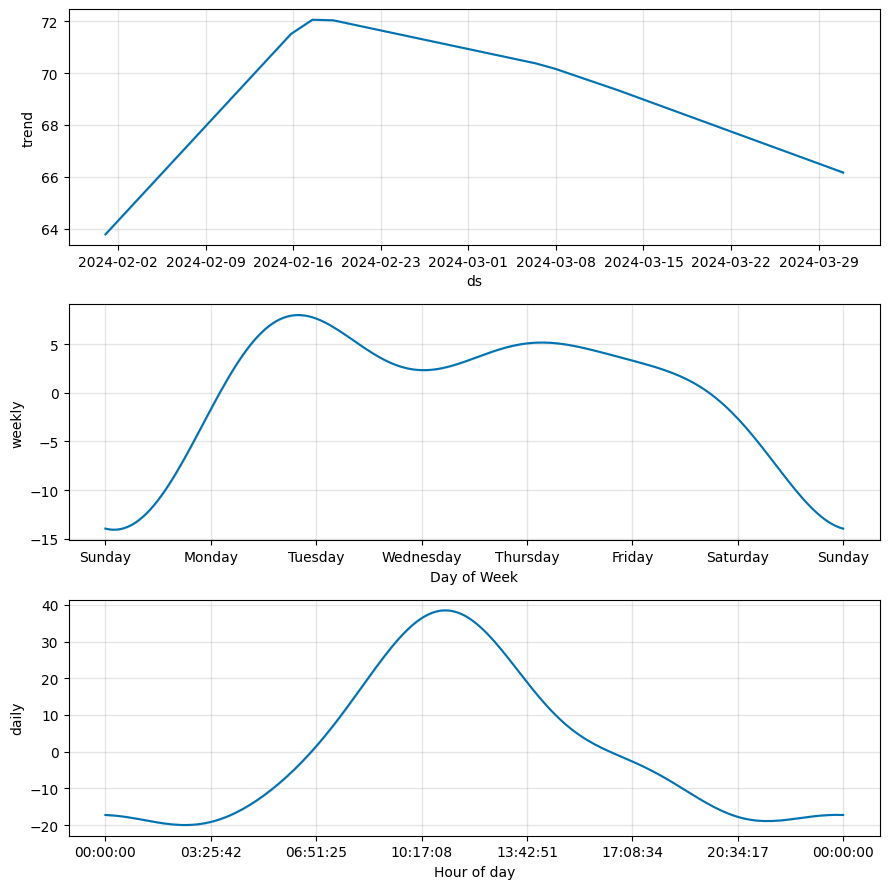

In [40]:
fig = m.plot_components(forecast)

## Test

In [44]:
eval_df = pd.DataFrame()
eval_df['ds'] = prophet_df['ds'][-48:]
eval_df['y_true'] = prophet_df['y'][-48:]
eval_df['y_pred'] = forecast['yhat'][-48:]
eval_df = eval_df.set_index(eval_df['ds'], drop = True)
eval_df = eval_df.drop('ds', axis = 1)
eval_df.head()

y_true     y_pred
ds                                       
2024-03-29 00:00:00  45.835366  52.568998
2024-03-29 01:00:00  47.466944  51.452651
2024-03-29 02:00:00  47.541321  49.906840
2024-03-29 03:00:00  47.572485  49.633641
2024-03-29 04:00:00  47.013774  51.740089

In [45]:
mae = mean_absolute_error(eval_df['y_true'], eval_df['y_pred'])
mse = mean_squared_error(eval_df['y_true'], eval_df['y_pred'])
print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 7.651153828977819
MSE: 100.5558677128143


In [46]:
confidence_interval_true = np.std(eval_df['y_true'])
confidence_interval_pred = np.std(eval_df['y_pred'])

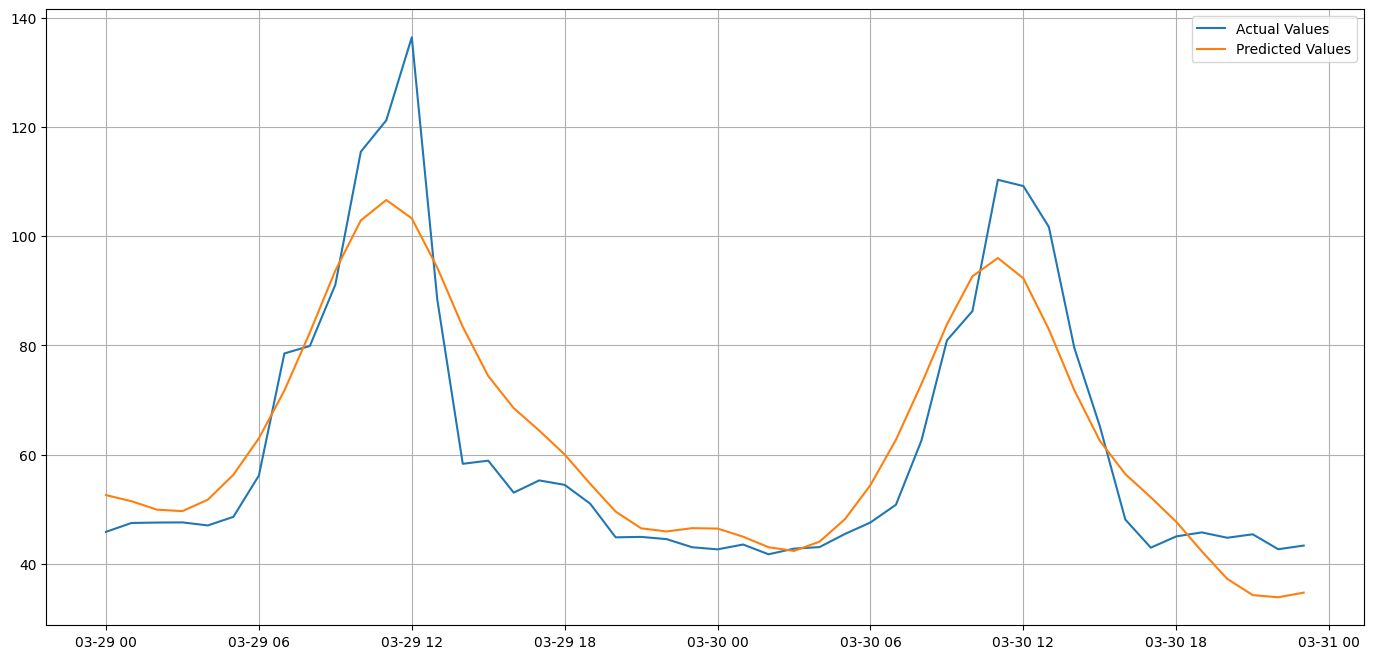

In [47]:
plt.figure(figsize=(17, 8))
plt.plot(eval_df['y_true'], label = "Actual Values")
plt.plot(eval_df['y_pred'], label = "Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

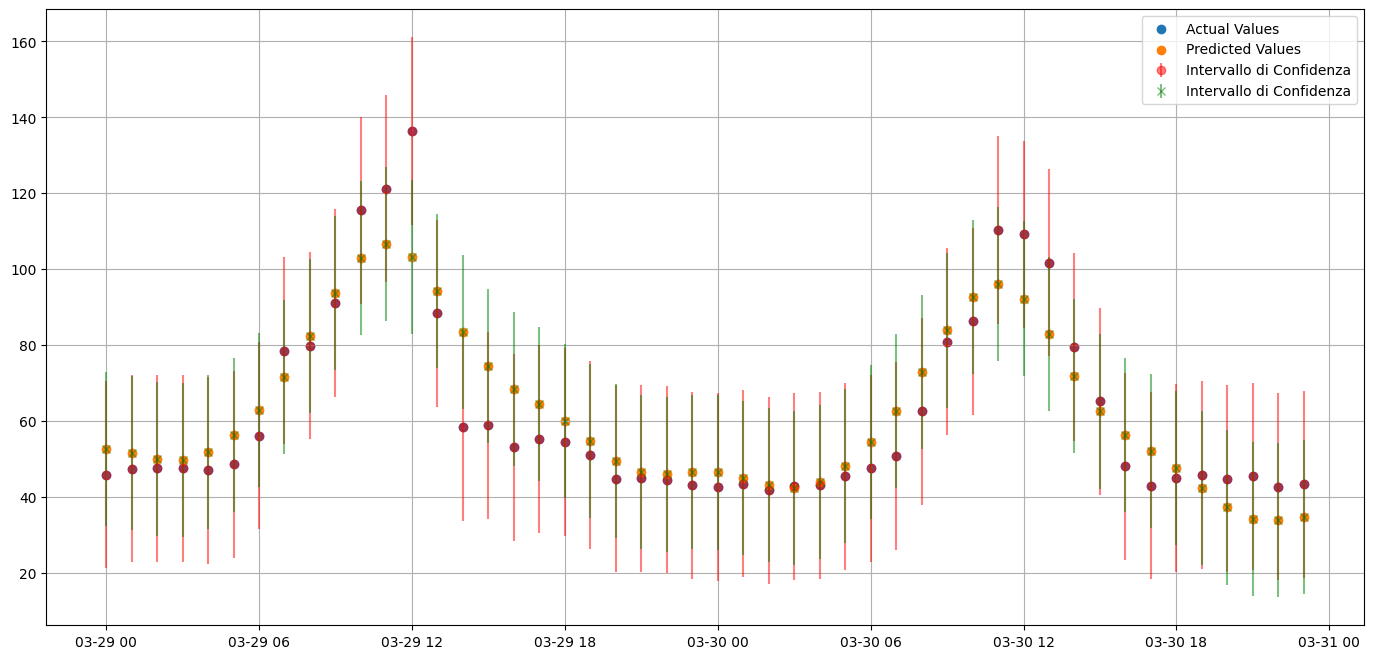

In [45]:
plt.figure(figsize=(17, 8))
plt.scatter(eval_df.index, eval_df['y_true'], label="Actual Values")
plt.scatter(eval_df.index, eval_df['y_pred'], label= "Predicted Values")
plt.errorbar(eval_df.index, eval_df['y_true'], confidence_interval_true, fmt='o', color='red', alpha=0.5, label = "Intervallo di Confidenza")
plt.errorbar(eval_df.index, eval_df['y_pred'], confidence_interval_pred, fmt='x', color='green', alpha=0.5, label = "Intervallo di Confidenza")
plt.legend()
plt.grid(True)

In [48]:
eval_df.to_csv(r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\results\eval_df.csv")

## LSTM

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [48]:
dataset_resampled.head()

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2024-02-01 00:00:00            68.401261            -8.036462   
2024-02-02 12:00:00            50.352004            -3.191518   
2024-02-07 17:00:00            82.510015             1.743308   
2024-02-07 18:00:00            76.567666            -1.562526   
2024-02-07 19:00:00            59.405278           -11.708486   

                     Power_P_1_7_0_W6.CV  Power_Q_3_7_0_W6.CV     APP_W4  \
DateTime                                                                   
2024-02-01 00:00:00             0.000000            -0.040000  68.871745   
2024-02-02 12:00:00             0.000000             0.000000  50.453049   
2024-02-07 17:00:00             1.863166             6.490438  82.528430   
2024-02-07 18:00:00             0.025000            -0.055000  76.583608   
2024-02-07 19:00:00             0.025000            -0.055000  60.548128   

                       APP_W6     REALW4    REALW6     DEMAND  DEMAND_TREND  
DateTime                                                                     
2024-02-01 00:00:00  0.040000  68.871745  0.000004  68.871757      0.000000  
2024-02-02 12:00:00  0.000000  50.453049  0.000000  50.453049    -18.418708  
2024-02-07 17:00:00  6.752568  82.528430  0.000608  82.804220     32.351172  
2024-02-07 18:00:00  0.060415  76.583608  0.000005  76.583632     -6.220588  
2024-02-07 19:00:00  0.060415  60.548128  0.000005  60.548158    -16.035474

In [83]:
print(dataset_resampled.shape)

(1223, 10)


In [91]:
X = dataset_resampled[['Power_P_1_7_0_W4.CV', 
                  'Power_Q_3_7_0_W4.CV',
                  'Power_P_1_7_0_W6.CV',
                  'Power_Q_3_7_0_W6.CV',
                  'APP_W4',
                  'APP_W6',
                  'REALW4',
                  'REALW6']]
y = dataset_resampled[['DEMAND']]

In [102]:
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size - 24):
        seq = data[i:i+window_size]  # (window_size, 8)
        target = data[i+window_size:i+window_size+24, -1]  # Selezioniamo solo la colonna target (es. ultima colonna)
        sequences.append(seq)
        labels.append(target)
    return np.array(sequences), np.array(labels)

In [104]:
window_size = 48  # Numero di ore passate da considerare come input
sequences, labels = create_sequences(X, window_size)
print(sequences.shape)

InvalidIndexError: (slice(48, 72, None), -1)

In [99]:
print(labels.shape)

(1175, 24, 8)


In [100]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(window_size, 8)))
model.add(Dense(24))  # Output di 24 predizioni
model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,024 (50.88 KB)

 Trainable params: 13,024 (50.88 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
# Addestramento del modello
history = model.fit(sequences, labels, epochs=10, batch_size=32)

Epoch 1/10


ValueError: Dimensions must be equal, but are 8 and 24 for '{{node compile_loss/mse/sub}} = Sub[T=DT_FLOAT](data_1, sequential_2_1/dense_2_1/Add)' with input shapes: [?,24,8], [?,24].

In [ ]:
last_sequence = dataset_resampled[-window_size:]  # Prendiamo l'ultima sequenza dal dataset
last_sequence = np.expand_dims(last_sequence, axis=0)  # Aggiungiamo una dimensione per renderlo compatibile con il modello
predictions = model.predict(last_sequence)

In [ ]:
import matplotlib.pyplot as plt

# Uniamo i dati originali e predetti
# Supponiamo che `original_data` sia il vettore che contiene i dati reali fino ad ora
full_series = np.concatenate([dataset_resampled, predictions.flatten()])

# Plot dei risultati
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(dataset_resampled)), dataset_resampled, label='Dataset')
plt.plot(np.arange(len(dataset_resampled), len(full_series)), predictions.flatten(), label='Predizioni (24h future)', color='red')
plt.legend()
plt.show()
